# Lab 5

In [1]:
# %matplotlib widget
# Imports and setup
from pint import UnitRegistry
import math
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import scipy

# Use pint
units = UnitRegistry()
units.default_format = "~P"
ureg = UnitRegistry()
ureg.setup_matplotlib()
Q_ = ureg.Quantity

In [2]:
V_out = [{4: 4.124,
          7: 7.10, 
          9: 9.04},
         {4: 4.043,
          7: 7.07, 
          9: 9.00}]

# Functions Used For Lab
def unpack_oscope(filepath):
    data = pd.read_csv(filepath)
    increment = float(data["Increment"][0])
    data = data.iloc[1: , :]
    data = data.astype(float)
    data["time"] = data["X"] * increment
    return data

def plot_task1(voltage):
    start_tick = 0
    end_tick = 15000
    
    data = unpack_oscope(f"../data/task1_{voltage}.csv")
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)  
    # Shunt voltage
    ax1.scatter(data["time"][start_tick:end_tick], data["CH1"][start_tick:end_tick], marker='.', s=0.5)
    ax1.set_ylim([-0.1, 0.25])
    # Drain Voltage
    ax2.scatter(data["time"][start_tick:end_tick], data["CH2"][start_tick:end_tick], marker='.', s=0.5)

    ax1.sharex(ax2)
    ax1.title.set_text("Shunt Voltage")
    ax2.title.set_text("Drain Voltage")
    ax2.set_xlabel("Time (s)")
    fig.suptitle(f"Shunt and Drain Voltage for V_out = {voltage}V") 

    plt.show()
    
def plot_combined_task1(voltages):
    start_tick = 0
    end_tick = 15000
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)  
    
    vdr = []
    vsh = []
    vdr_max = []
    
    for voltage in voltages:
        data = unpack_oscope(f"../data/task1_{voltage}.csv")
        # Drain voltage
        vdr.append(ax2.scatter(data["time"][start_tick:end_tick], data["CH2"][start_tick:end_tick], marker='.', s=0.5))
        vdr[-1].set_label(f"Drain: {voltage} V")
        vdr_max.append(np.mean(data["CH2"][7900:8100]))
        # Shunt Voltage
        vsh.append(ax1.scatter(data["time"][start_tick:end_tick], data["CH1"][start_tick:end_tick], marker='.', s=0.5))
        vsh[-1].set_label(f"Shunt: {voltage} V")

    ax1.sharex(ax2)
    ax1.set_ylim([-0.1, 0.35])
    ax2.set_ylim([-1, 35])
    ax2.set_xlabel("Time (s)")


    ax2.title.set_text(f"Drain Voltage")
    ax1.title.set_text(f"Shunt Voltage")
    ax2.legend(markerscale=10, bbox_to_anchor=(1.05, 1.05))
    ax1.legend(markerscale=10, bbox_to_anchor=(1.05, 1.05))
    plt.show()
    
def plot_combined_task2(voltages):
    start_tick = 0
    end_tick = 25000
    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)  
    
    vdr = []
    vsh = []
    vdr_max = []
    
    for voltage in voltages:
        data = unpack_oscope(f"../data/task2_{voltage}.csv")
        # Drain voltage
        vdr.append(ax2.scatter(data["time"][start_tick:end_tick], data["CH2"][start_tick:end_tick], marker='.', s=0.5))
        vdr[-1].set_label(f"Drain: {voltage} V")
        vdr_max.append(np.mean(data["CH2"][7900:8100]))
        # Shunt Voltage
        vsh.append(ax1.scatter(data["time"][start_tick:end_tick], data["CH1"][start_tick:end_tick], marker='.', s=0.5))
        vsh[-1].set_label(f"Shunt: {voltage} V")

    ax1.sharex(ax2)
    # ax1.set_ylim([-0.1, 0.35])
    # ax2.set_ylim([-1, 35])
    
    ax2.set_xlabel("Time (s)")
    ax2.title.set_text(f"Drain Voltage")
    ax1.title.set_text(f"Shunt Voltage")
    ax2.legend(markerscale=10, bbox_to_anchor=(1.05, 1.05))
    ax1.legend(markerscale=10, bbox_to_anchor=(1.05, 1.05))
    plt.show()
    
    
def get_dvdr_dt(voltage, plot):
    start_tick = 3600
    end_tick = 4800
    
    data = unpack_oscope(f"../data/task1_{voltage}.csv")
    # compute slope m and intercept b
    m, b = np.polyfit(data["time"][start_tick:end_tick],
                      data["CH1"][start_tick:end_tick], deg=1)

    if plot:
        # Plot
        fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)  
        # Shunt voltage
        ax1.scatter(data["time"][start_tick:end_tick], data["CH1"][start_tick:end_tick], marker='.')
        # Line of best fit
        # plot fitted I_PK = m*voltages + b
        ax1.axline(xy1=(0.95e-5, 0.95e-5*m +b), slope=m, color='r', label=f'dvdr_dt = {m:.2f}(vcomp) {b:+.2f}')
        # Drain Voltage
        ax2.scatter(data["time"][start_tick:end_tick], data["CH2"][start_tick:end_tick], marker='.')

        
        # Extras
        ax1.title.set_text(f"Gate Voltage @ V=V")
        ax2.title.set_text(f"Gate to Drain Voltage @ V=V")
        fig.suptitle(f"V =V") 
        plt.show()
    return m

def get_inductance(voltages):
    R = 0.05 # Ohms
    L = []
    Vg = 18 # V
    
    for voltage in voltages:
        didt = get_dvdr_dt(voltage, False) / R
        L.append(Vg / didt)
        
    return L, np.mean(L)


def get_drain_voltage(voltage, plot):
    start_tick = 6000
    end_tick = 9000
    
    data = unpack_oscope(f"../data/task1_{voltage}.csv")
    avg_vdrain = np.mean(data["CH2"][start_tick:end_tick]) 

    if plot:
        # Plot
        fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)  
        # Shunt voltage
        ax1.scatter(data["time"][start_tick:end_tick], data["CH1"][start_tick:end_tick], marker='.')
        # Line of best fit
        # plot fitted I_PK = m*voltages + b
        ax2.axline(xy1=(data["time"][start_tick], avg_vdrain), slope=0, color='r', label=f'dvdr_dt =')
        # Drain Voltage
        ax2.scatter(data["time"][start_tick:end_tick], data["CH2"][start_tick:end_tick], marker='.')

        
        # Extras
        ax1.title.set_text(f"Gate Voltage @ V=V")
        ax2.title.set_text(f"Gate to Drain Voltage @ V=V")
        fig.suptitle(f"V =V") 
        plt.show()
    return avg_vdrain

def get_a(voltages):
    a = []
    Vg = 18 # V
    V_out_dict = V_out[0]
    
    for voltage in voltages:
        vdrain = get_drain_voltage(voltage, False)
        a.append(V_out_dict[voltage]/(vdrain-Vg))
    return a, np.mean(a)

def get_dvoutdt(voltage, plot, start_tick=5400, end_tick=6600):
    
    data = unpack_oscope(f"../data/task2_{voltage}.csv")
    # compute slope m and intercept b
    m, b = np.polyfit(data["time"][start_tick:end_tick],
                      data["CH2"][start_tick:end_tick], deg=1)

    if plot:
        # Plot
        fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)  
        # Shunt voltage
        ax1.scatter(data["time"][start_tick:end_tick], data["CH1"][start_tick:end_tick], marker='.')
        # Line of best fit
        # plot fitted I_PK = m*voltages + b
        ax2.axline(xy1=(data["time"][start_tick], data["time"][start_tick]*m +b), slope=m, color='r', label=f'dvdr_dt = {m:.2f}(vcomp) {b:+.2f}')
        # Drain Voltage
        ax2.scatter(data["time"][start_tick:end_tick], data["CH2"][start_tick:end_tick], marker='.')

        
        # Extras
        ax1.title.set_text(f"Gate Voltage @ V=V")
        ax2.title.set_text(f"Gate to Drain Voltage @ V=V")
        fig.suptitle(f"V =V") 
        plt.show()
    return m

def get_C(voltages, a):
    start_ticks = {4: 5200,
                   7: 1900,
                   9: 1100}
    end_ticks = {4: 6600,
                 7: 4000,
                 9: 2700}
        
    C = []
    R = 5 # Ohms
    V_out_dict = V_out[1]
    
    for i, voltage in enumerate(voltages):
        dvdt = get_dvoutdt(voltage,
                           False,
                           start_ticks[voltage],
                           end_ticks[voltage])
        # print("dvdt", voltage, dvdt)
        C.append(-V_out_dict[voltage] / R / dvdt / a[i]**2)
    return C, np.mean(C)

In [3]:
L, L_mean = get_inductance([4, 7, 9])
print(f"Q7: The average inductance is {(L_mean*units.henry).to_compact()}. The raw values were {L}.")

Q7: The average inductance is 19.660583670167416 µH. The raw values were [1.89584351380796e-05, 1.953990870815634e-05, 2.0483407164266302e-05].


In [4]:
a, a_mean = get_a([4, 7, 9])
print(f"Q8: The average a value is {a_mean:.3f}. The raw values were {a}.")

Q8: The average a value is 0.634. The raw values were [0.6182537778843843, 0.6460888872711389, 0.6373138817867351].


Q9:
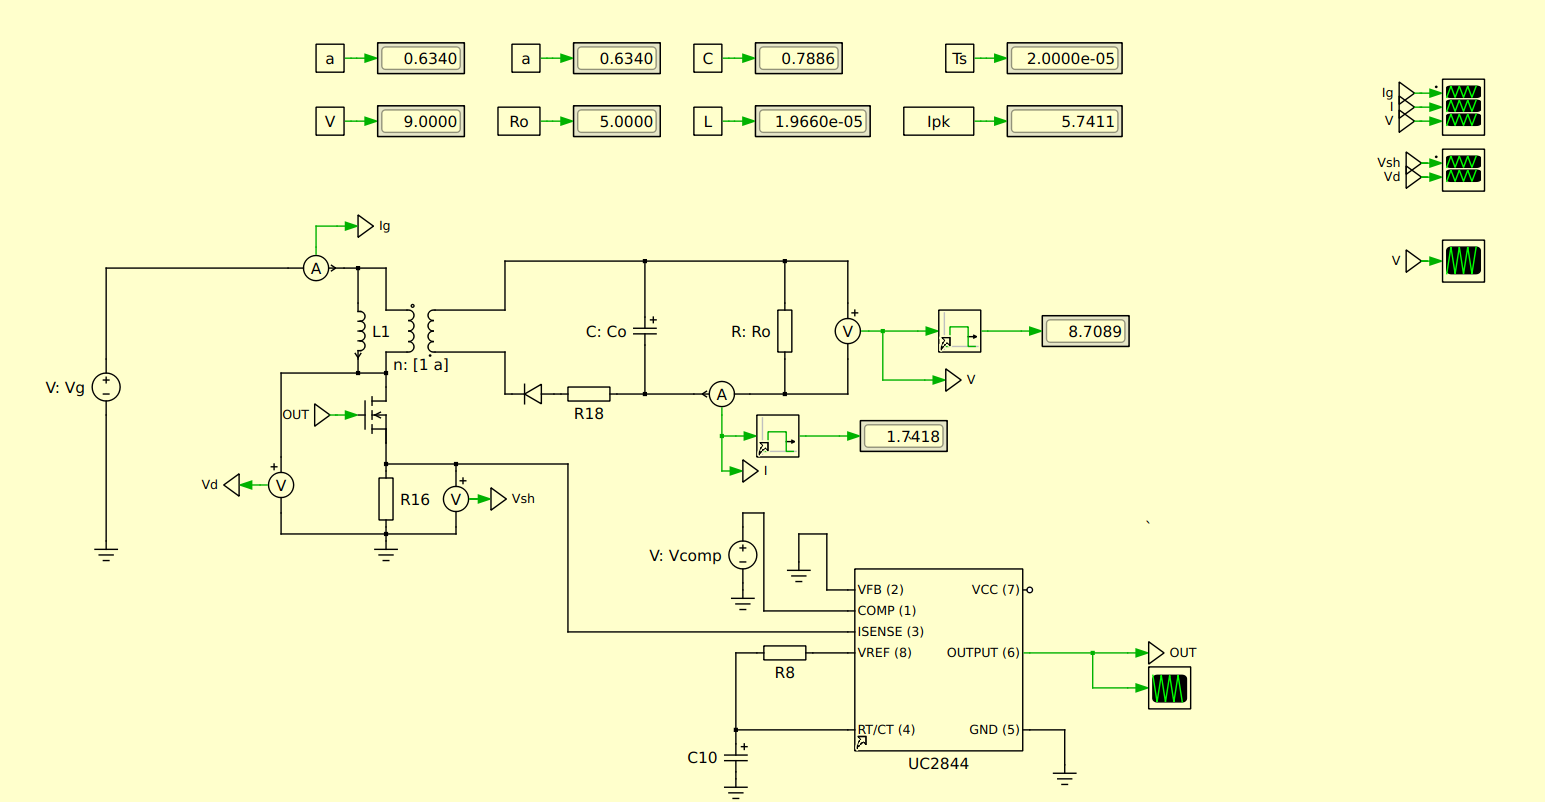

#### Shunt and Drain Voltages

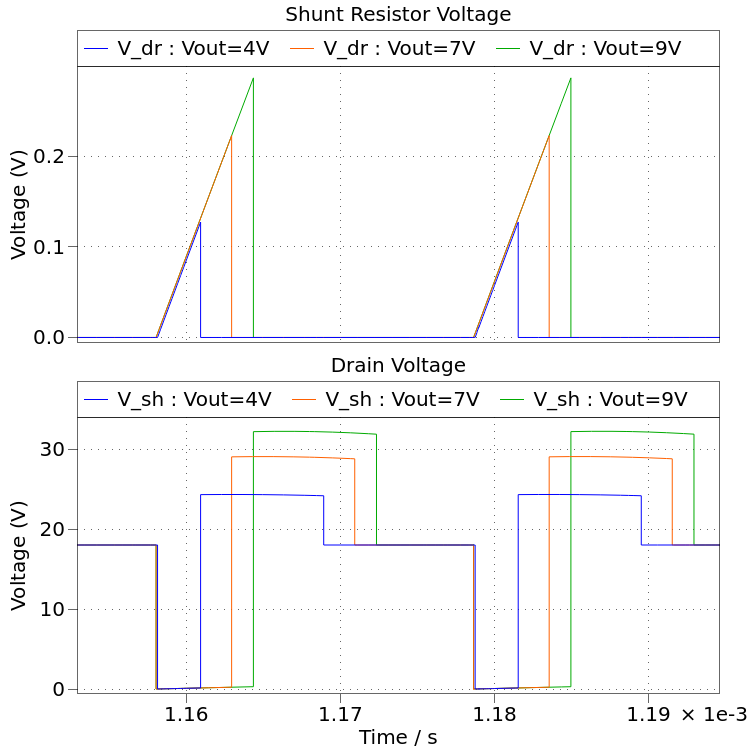

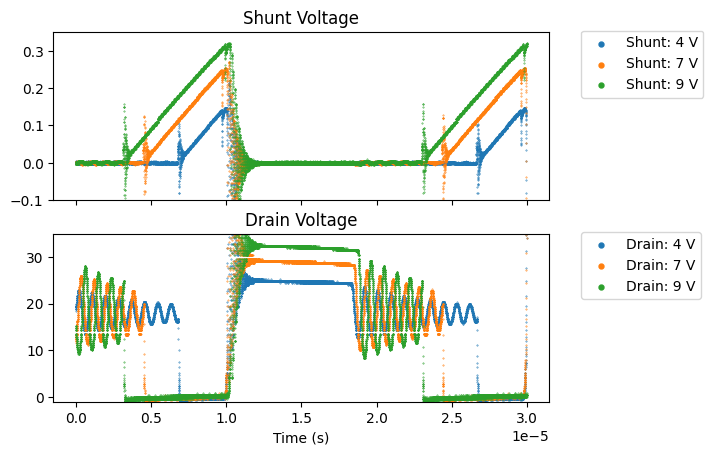

In [5]:
plot_combined_task1([4, 7, 9])

The simulated peak shunt voltages are 0.13, 0.22, and 0.29 V respectively. For our measured, 0.14, 0.24, and 0.32 V respectively. 

The simulated duty cycles are 0.14, 0.25, and 0.32 respectively. The measured duty cycles were 0.16, 0.27, and 0.34 respectively.

Both of these differences can be explained by the simulated output voltage being slightly lower than the value used for calculation (for instance, an output of 8.7 V for a calculation value of 9 V) since it was not tuned using a potentiometer.

#### Output Voltages
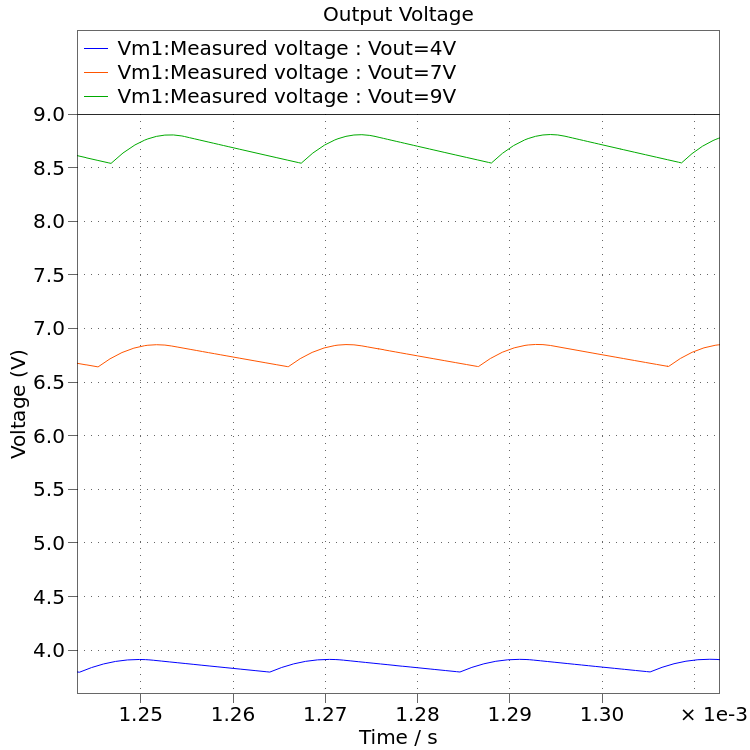

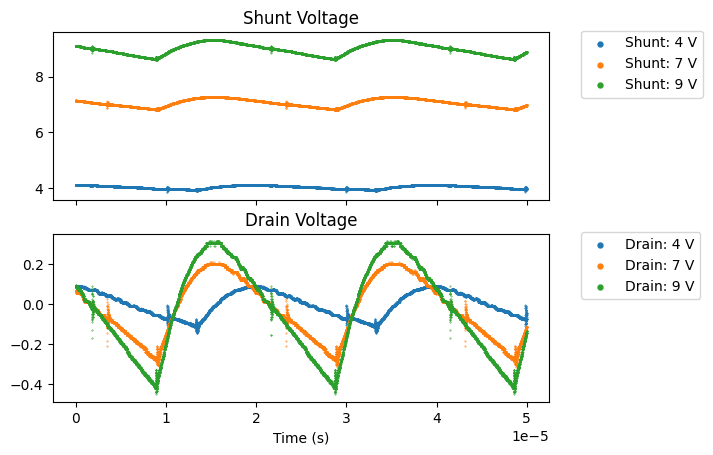

In [6]:
plot_combined_task2([4, 7, 9])

For the simulation, the voltages out have amplitudes of 0.11, 0.20, and 0.25 V respectively. However, for the measured curves, the amplitudes are 0.21, 0.49, and 0.73 V respectively. The output voltages for the simulation were generated using a set V = 4, 7, 9 V, which resulted in output voltages slightly below these values. For the measured data, we turned the potentiometer rather than had a set input which would explain this discrepancy. Both simulation and measured Vouts have a period of about 20 $\mu s$. 

Q10:

A. Generally, yes. We are able to get an output voltage based on setting parameters based on our simplifications. We do not see ringing in our simulation which is the main difference I observed. Also, I am unsure why, but the measured output voltage has a greater amplitude ripple than the simulated by almost a factor of 2. 

B. The measured peak current is slightly above the simulated (~10%), likely because the simulated output voltage was not tuned with a potentiometer and is slightly below the measured. For the same reason, I found the duty cycles of measured to be slightly (+0.02 or less) above the simulated.

C. The high frequency oscillation on the drain voltage appears to be at about 1.15 MHz. Since this ringing is likely a result of the LC part of the circuit, we can look to figure out what the capacitance is from the ringing: $f = \frac{1}{2\pi \sqrt{LC}}$. Rearranging this equation we get $C = \frac{1}{(2\pi f)^2 L}$. We find a capacitance of 0.96 uH that could be parasitic from the windings. 

In [10]:
# get_dvoutdt(7, True, start_tick=1900, end_tick=4400)
C, C_mean = get_C([4, 7, 9], a)
print(f"Q11: The average C value is {(C_mean*units.farad).to_compact()}. The raw values were {C}.")

Q11: The average C value is 97.70660598255817 µF. The raw values were [0.00012936676851847882, 8.710881914665881e-05, 7.664423028253694e-05].


The value for the capacitance varied a bit with the output voltage, indicating that there may be issues with the method used. The 4V capacitance measurement had the fewest data points at lowest resolution and was further away from the other two measurements, so it may have been better to weigh that less than the other measurements.